<a href="https://colab.research.google.com/github/thisishasan/slda/blob/hasan/04_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

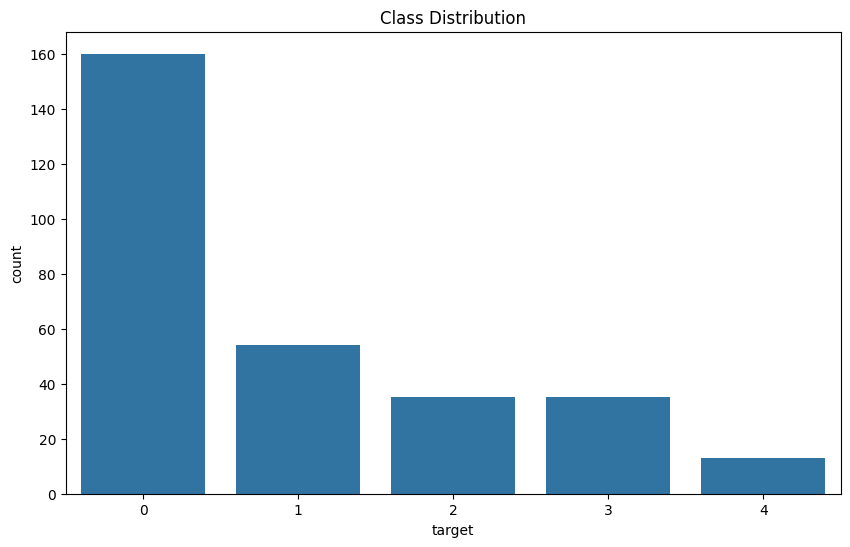

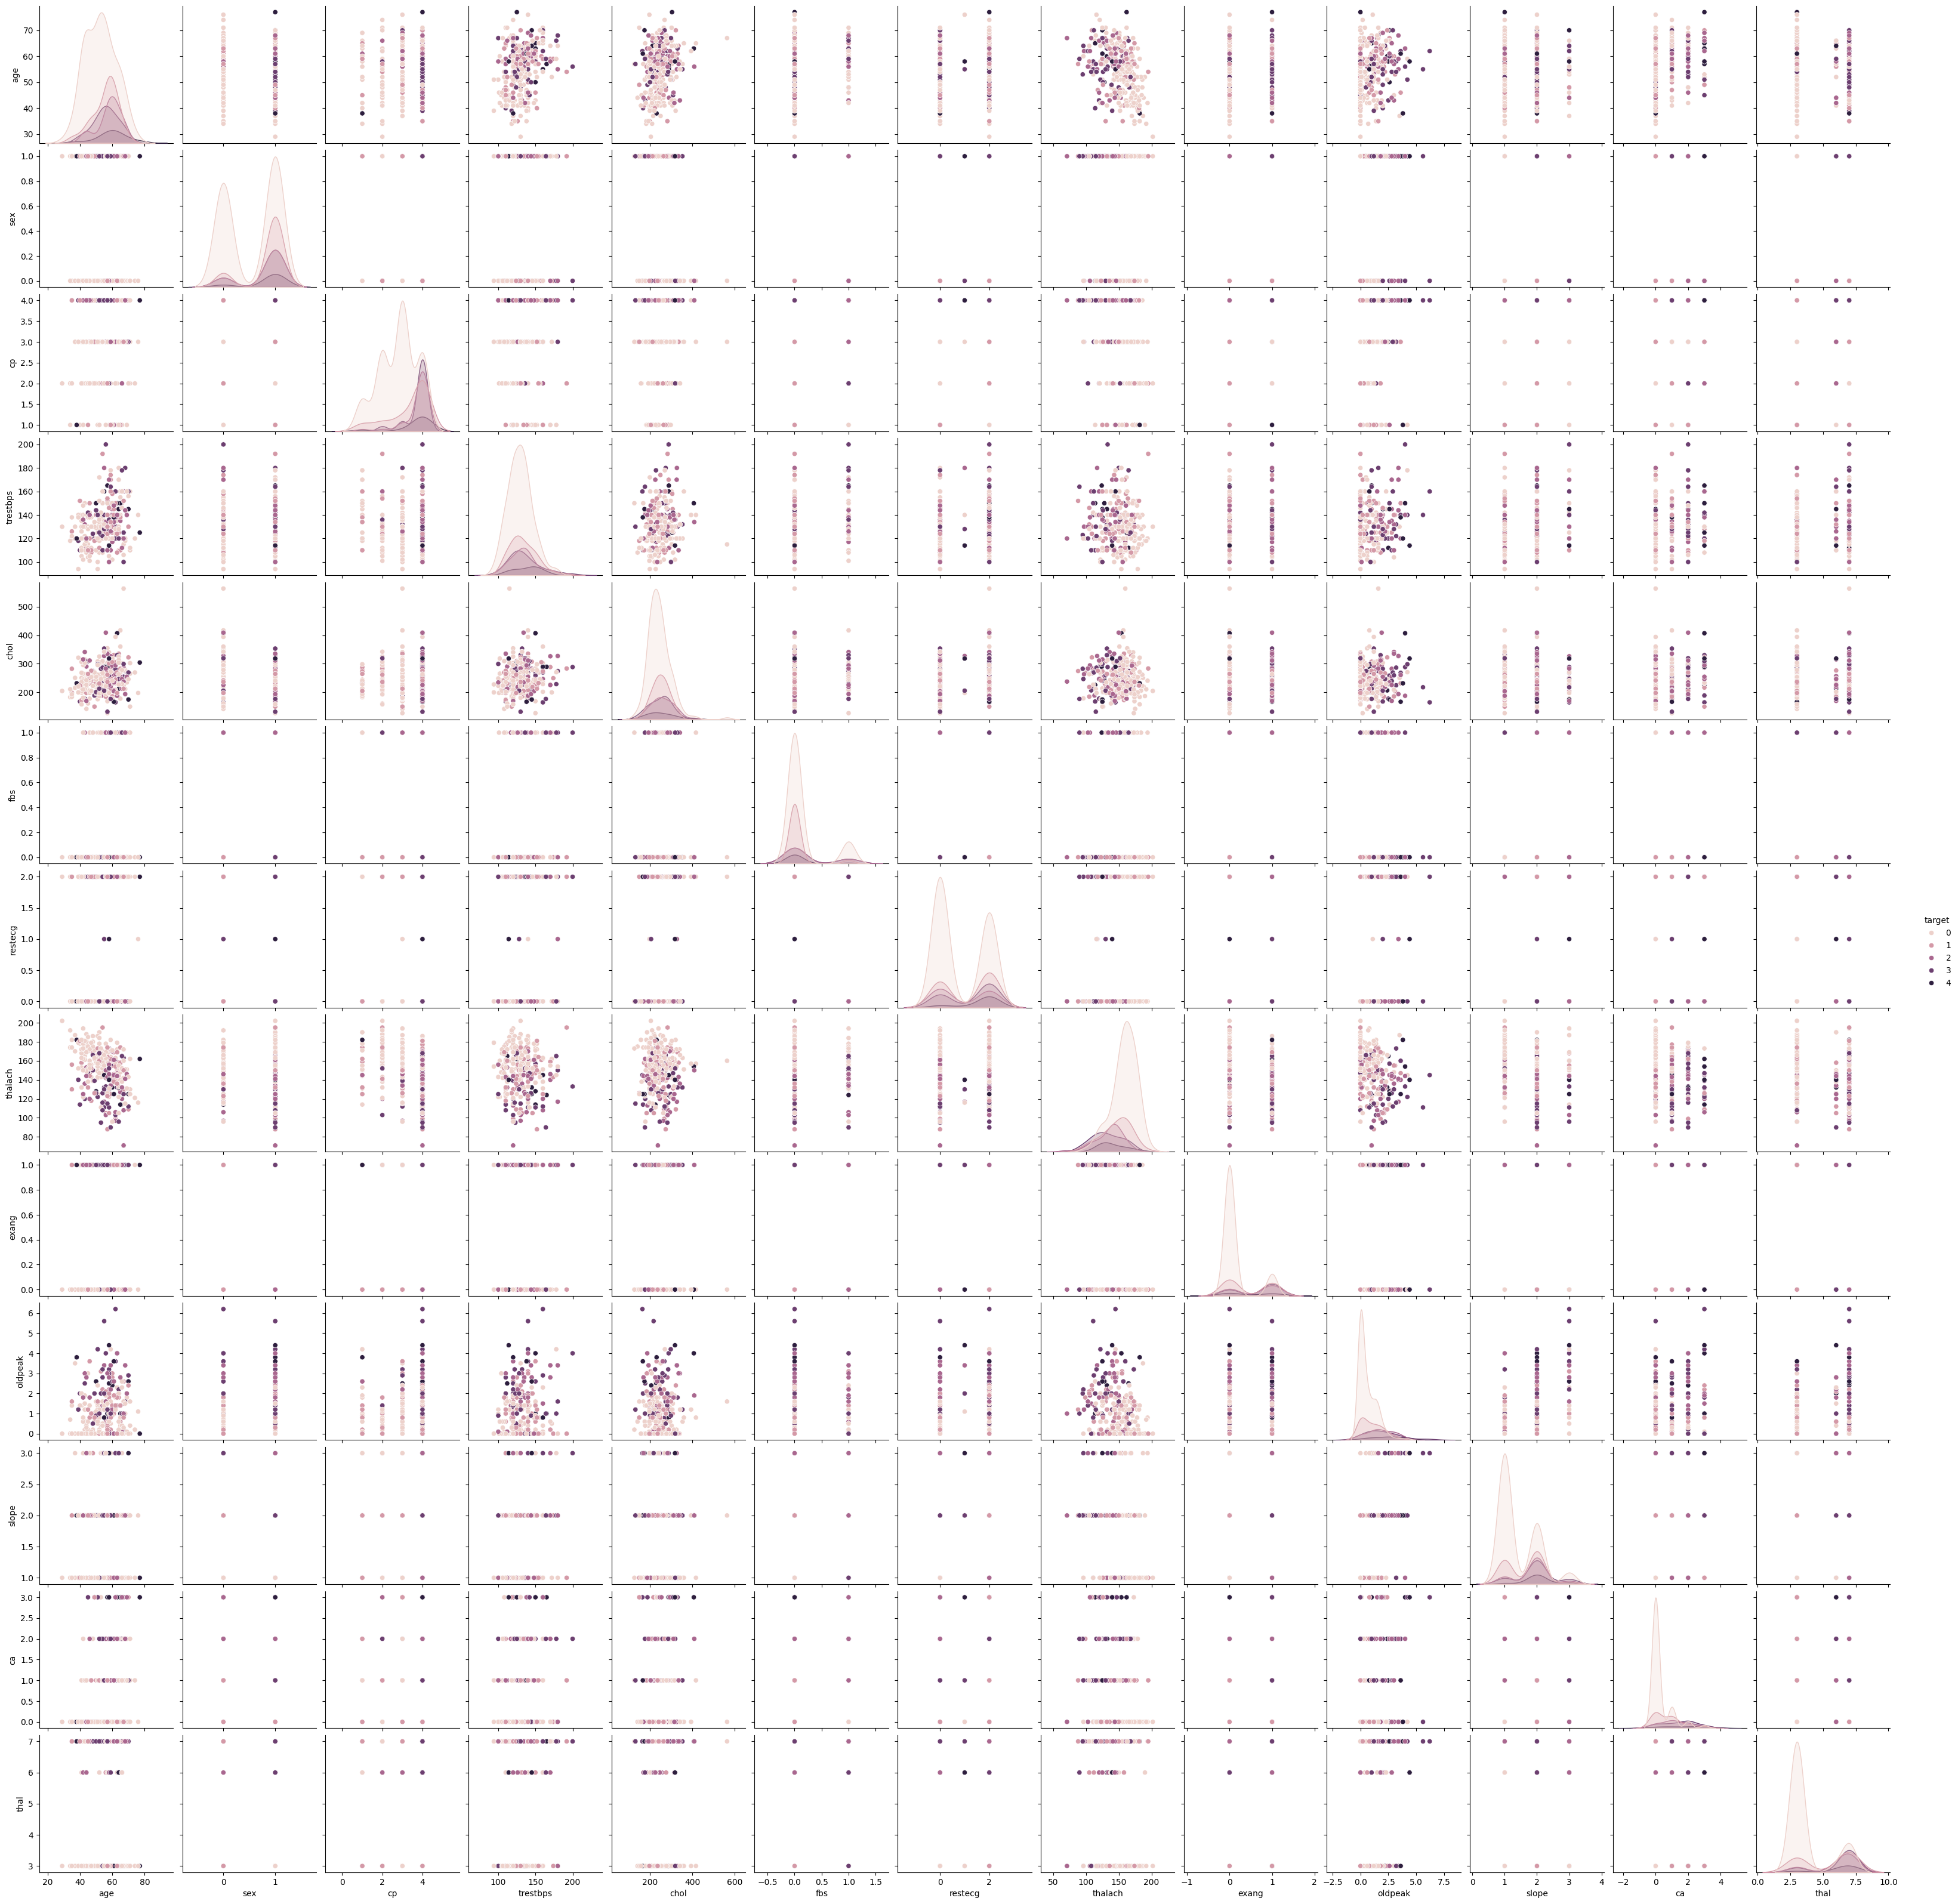

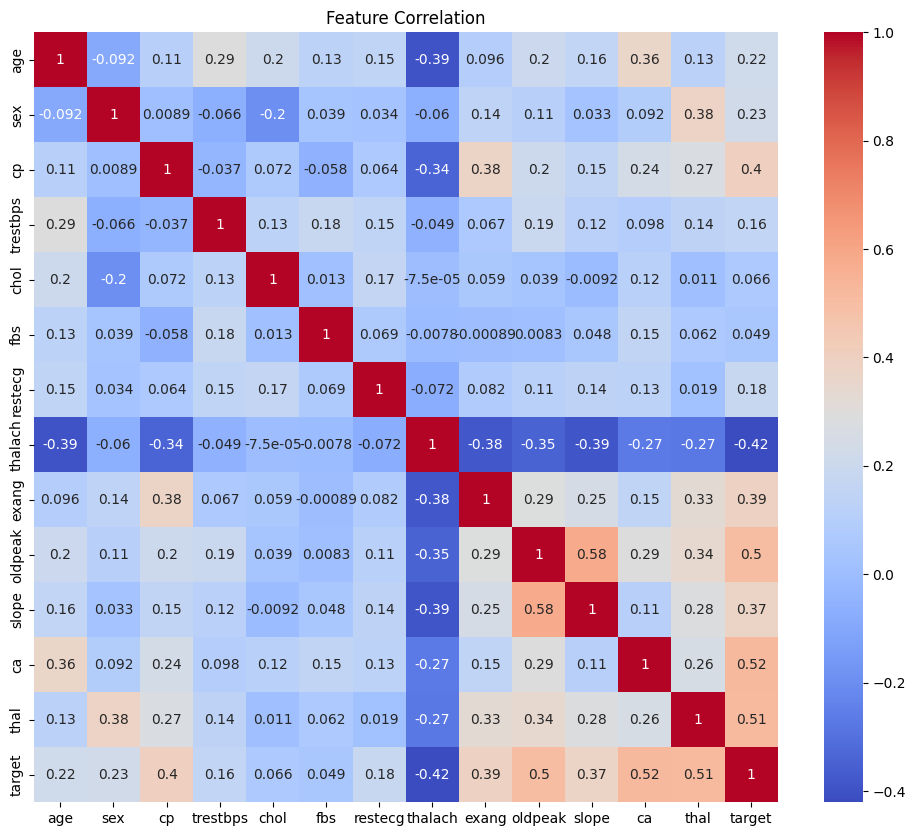


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.87      0.84      0.86        32

    accuracy                           0.86        64
   macro avg       0.86      0.86      0.86        64
weighted avg       0.86      0.86      0.86        64



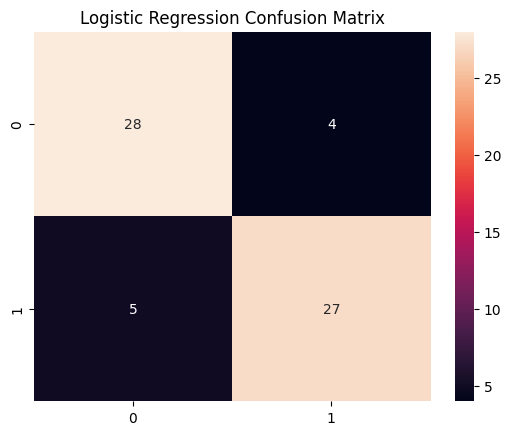


LDA Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        32
           1       0.93      0.81      0.87        32

    accuracy                           0.88        64
   macro avg       0.88      0.88      0.87        64
weighted avg       0.88      0.88      0.87        64



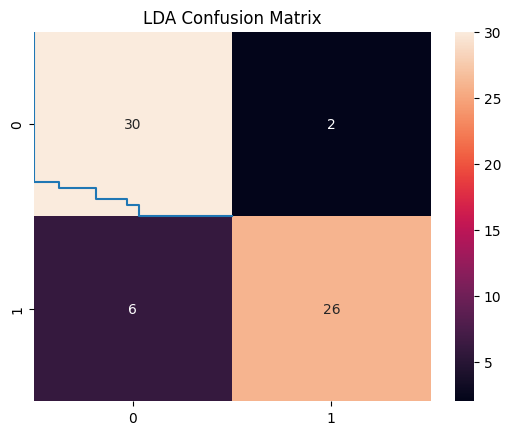


QDA Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.81      0.81      0.81        32

    accuracy                           0.81        64
   macro avg       0.81      0.81      0.81        64
weighted avg       0.81      0.81      0.81        64



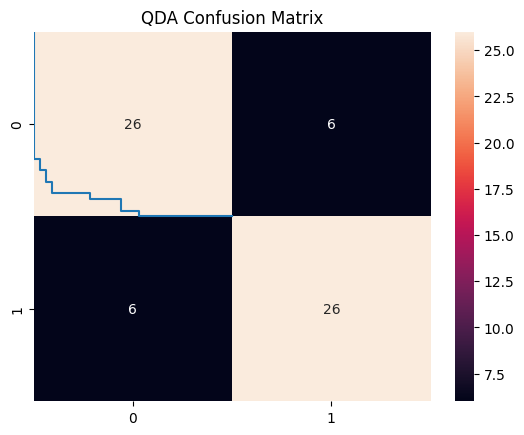


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.66      0.71        32
           1       0.70      0.81      0.75        32

    accuracy                           0.73        64
   macro avg       0.74      0.73      0.73        64
weighted avg       0.74      0.73      0.73        64



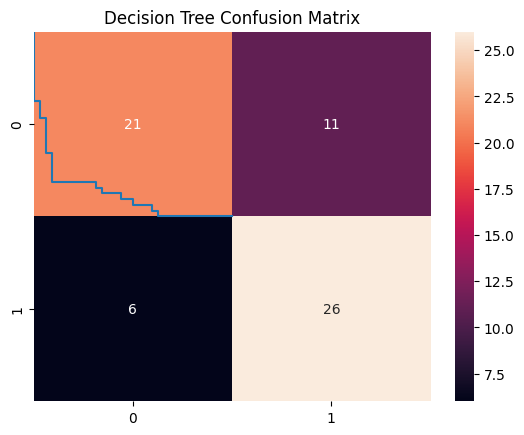

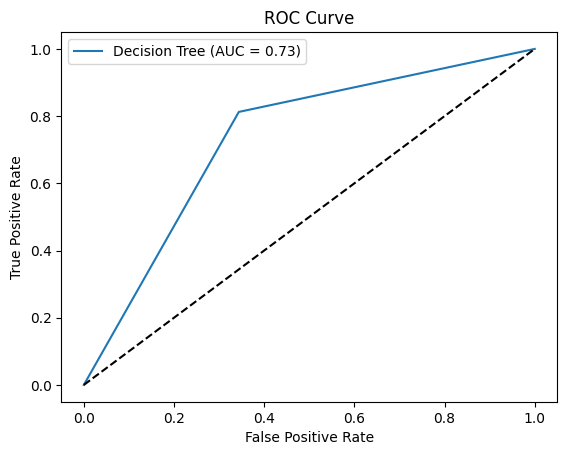

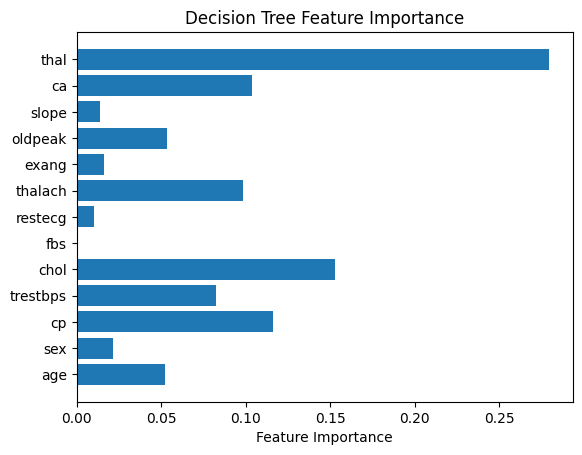

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

# Load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=columns)

# Data Cleaning: Handle missing values
data.replace('?', np.nan, inplace=True)
data = data.dropna()
data = data.apply(pd.to_numeric)

# EDA
plt.figure(figsize=(10,6))
sns.countplot(x='target', data=data)
plt.title('Class Distribution')
plt.show()

sns.pairplot(data, hue='target')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# Data Preprocessing
X = data.drop('target', axis=1)
y = data['target']
y = y.apply(lambda x: 1 if x > 0 else 0)  # Binary classification

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building and Evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'Decision Tree': DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    # ROC Curve
    y_prob = model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature Importance for Decision Tree
feature_importance = models['Decision Tree'].feature_importances_
plt.barh(X.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()
